In [35]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Visualizar as primeiras linhas do dataset para verificar se o arquivo foi importado corretamente.
print(df.head())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [36]:
#Informações básicas sobre o dataset
print(df.info())

# Estatísticas descritivas
print(df.describe())

# Verificar quantos valores por categoria nulos
print(df.isnull().sum())

# Contar valores únicos em cada coluna para entender a cardinalidade
print(df.nunique())

print(df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [37]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding para variáveis binárias
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding para variáveis categóricas com mais de dois valores
one_hot_cols = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
df = pd.get_dummies(df, columns=one_hot_cols)


Variáveis Potencialmente Sensíveis a Outliers
Age (Idade):

Tipo: Contínua.
Relevância: A idade pode influenciar o metabolismo e mudanças no estilo de vida que afetam o peso. Outliers podem ser indivíduos muito jovens ou muito idosos comparados com a população típica estudada.
Height (Altura):

Tipo: Contínua.
Relevância: Alturas extremamente baixas ou altas podem afetar a análise, especialmente se forem resultado de erros de entrada de dados ou populações específicas com características únicas.
Weight (Peso):

Tipo: Contínua.
Relevância: Peso é diretamente relacionado à obesidade. Outliers aqui podem distorcer a relação entre peso e outras variáveis, como altura (índice de massa corporal).
FCVC (Frequência de consumo de vegetais):

Tipo: Inteiro.
Relevância: Consumo muito irregular de vegetais pode ser um outlier se a maioria da população segue um padrão mais consistente.
NCP (Número de refeições principais):

Tipo: Contínua.
Relevância: Valores extremamente baixos ou altos podem indicar hábitos alimentares incomuns que são críticos para entender padrões de obesidade.
CH2O (Consumo diário de água):

Tipo: Contínua.
Relevância: A hidratação pode influenciar o metabolismo e a saúde geral. Outliers podem ser valores irrealisticamente baixos ou altos de consumo de água.
FAF (Frequência de atividade física):

Tipo: Contínua.
Relevância: Níveis extremos de atividade física podem ser outliers, especialmente em contextos onde a maioria dos indivíduos segue um padrão mais moderado.
TUE (Uso de dispositivos tecnológicos):

Tipo: Inteiro.
Relevância: Extremos nessa variável podem indicar comportamentos sedentários ou ativos que são incomuns.

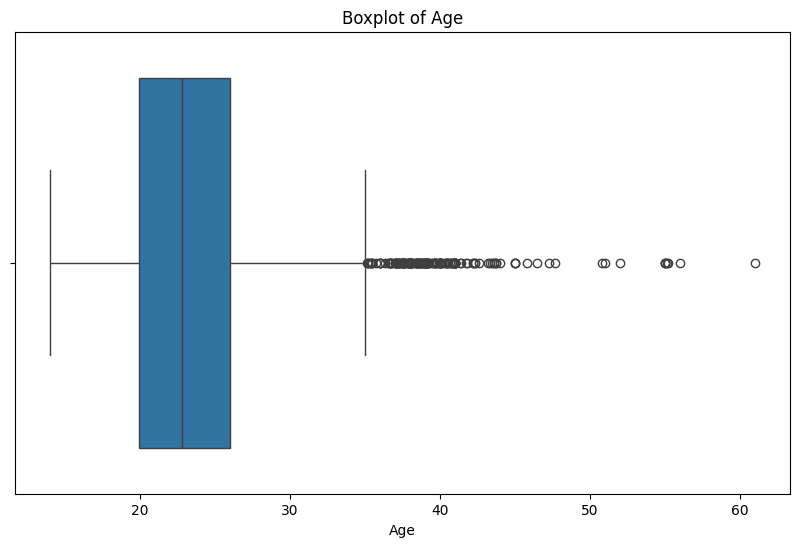

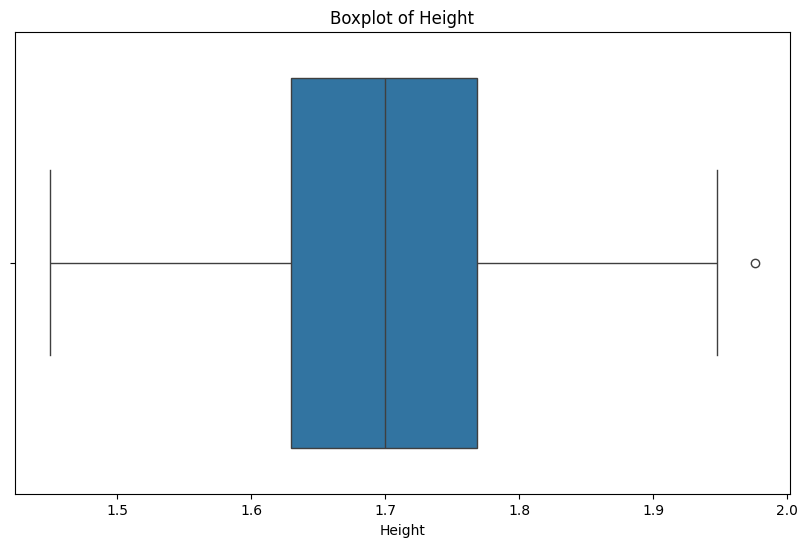

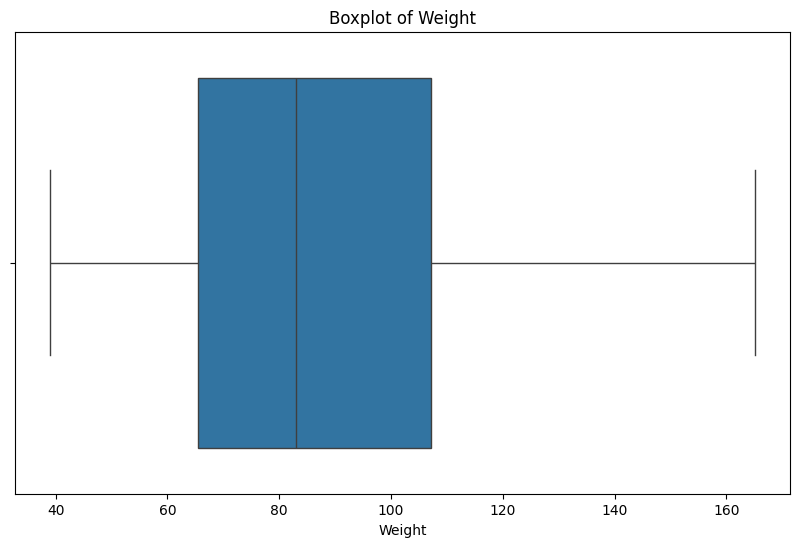

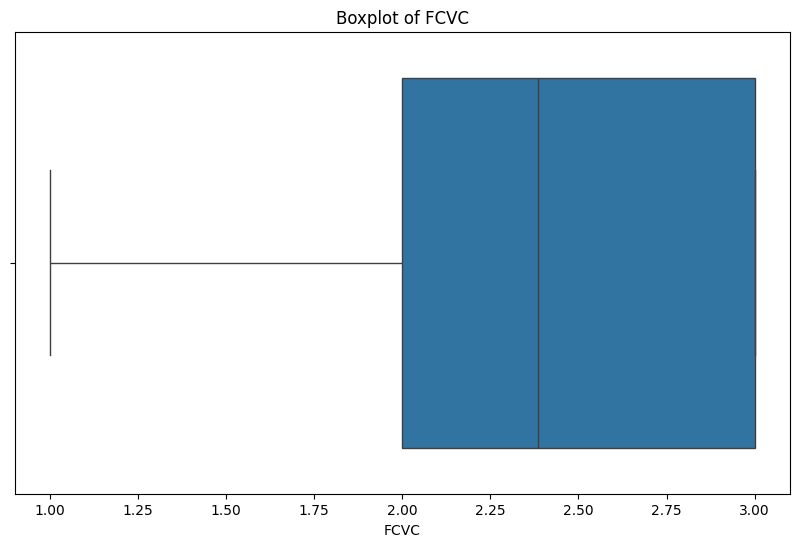

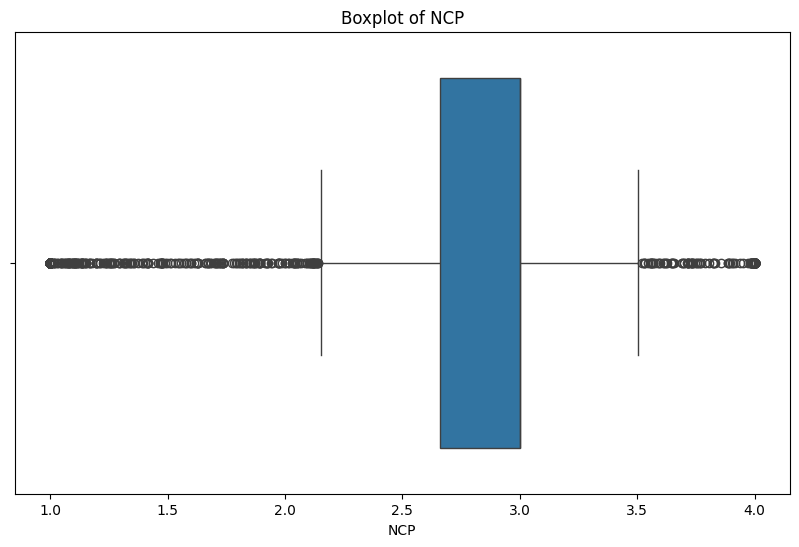

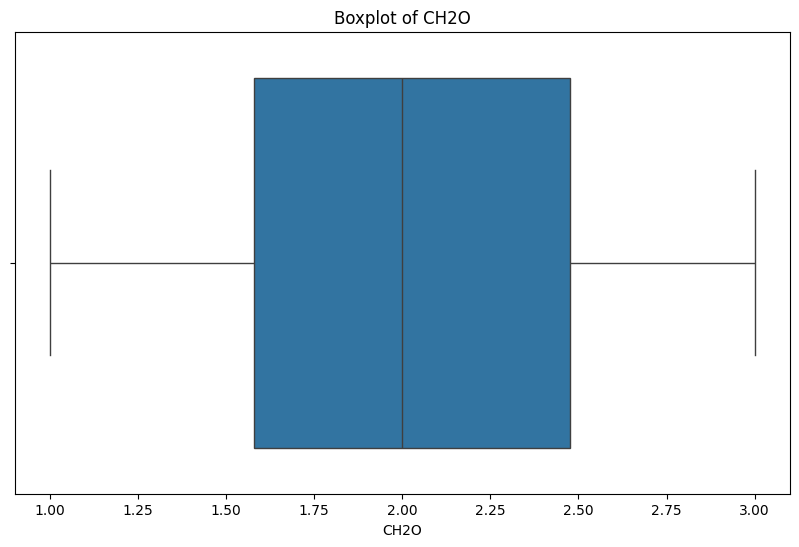

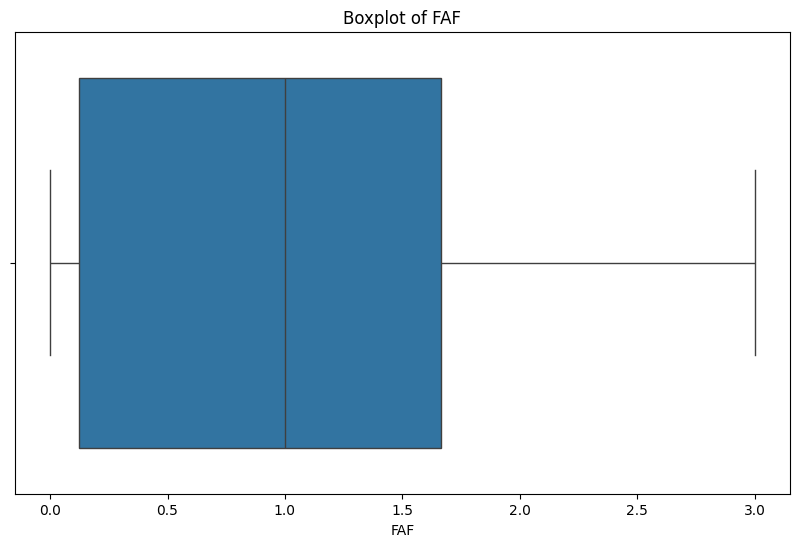

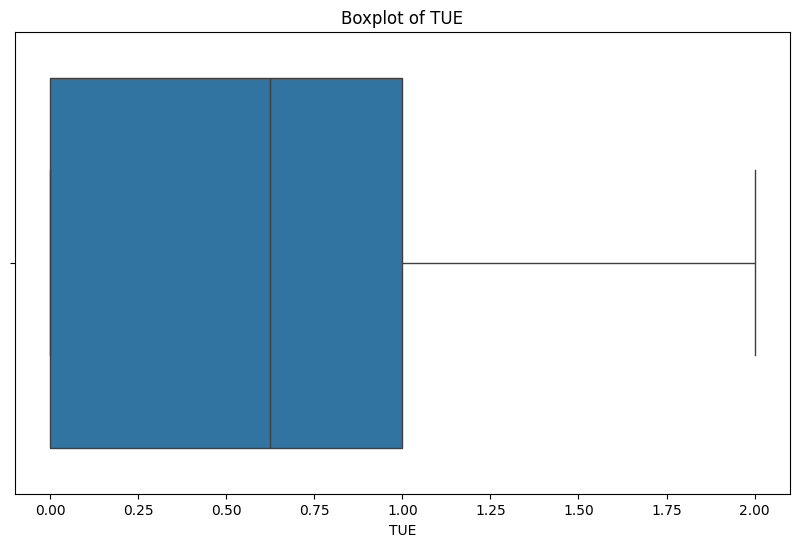

In [40]:


# Visualizar boxplots para variáveis selecionadas
relevant_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in relevant_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Age (Idade):

A distribuição parece razoavelmente normal, com poucos outliers. A maioria das idades está concentrada em uma faixa específica, com algumas poucas observações mais extremas.
Height (Altura):

Há uma concentração de valores na faixa média com alguns outliers visíveis nas extremidades inferiores e superiores. Isso sugere que há algumas alturas muito baixas e muito altas que são atípicas em relação à população geral.
Weight (Peso):

Similar à altura, o peso mostra uma distribuição centrada com outliers em ambas extremidades. Os outliers em peso podem ter implicações significativas em estudos sobre obesidade, pois podem representar casos extremos de baixo peso ou sobrepeso.
FCVC (Frequência de consumo de vegetais):

Este gráfico indica uma distribuição bastante uniforme com alguns outliers. Pode haver pessoas que raramente ou nunca consomem vegetais, ou o contrário, consomem muito frequentemente.
NCP (Número de refeições principais por dia):

A maioria das pessoas parece seguir um padrão regular de refeições diárias, mas há outliers que sugerem um número muito menor ou maior de refeições principais, o que pode afetar a análise de hábitos alimentares e obesidade.
CH2O (Consumo de água diário):

A quantidade de água consumida diariamente também mostra alguns valores extremos, com a maioria das observações agrupadas em torno de uma média. Esses extremos podem indicar erro de medição ou comportamentos de hidratação muito atípicos.
FAF (Frequência de atividade física):

A atividade física varia significativamente, com alguns indivíduos relatando níveis extremamente baixos ou altos de atividade. Outliers aqui podem influenciar análises relacionadas à atividade física e seu impacto na obesidade.
TUE (Tempo de uso de tecnologia):

Existem alguns valores extremos indicando um uso muito alto ou muito baixo de tecnologia. Isso é relevante para entender comportamentos sedentários que podem estar associados à obesidade.

In [41]:
for col in ['Weight', 'Height', 'CH2O', 'FAF']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]


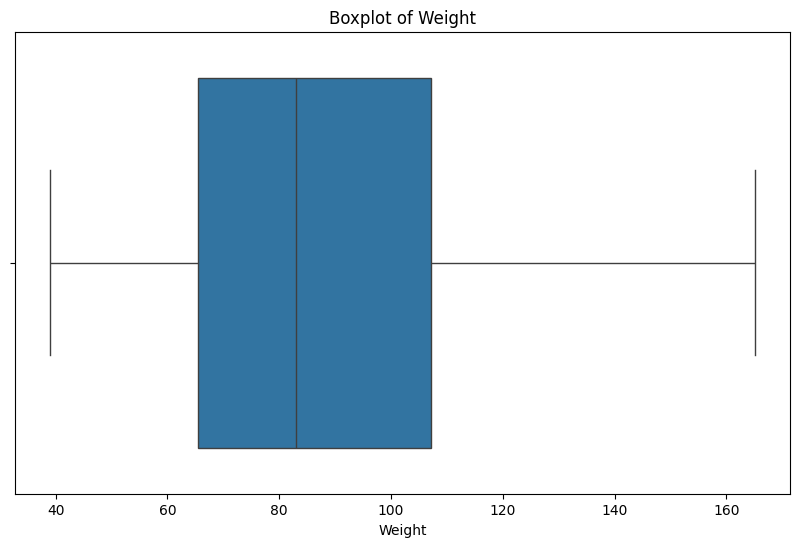

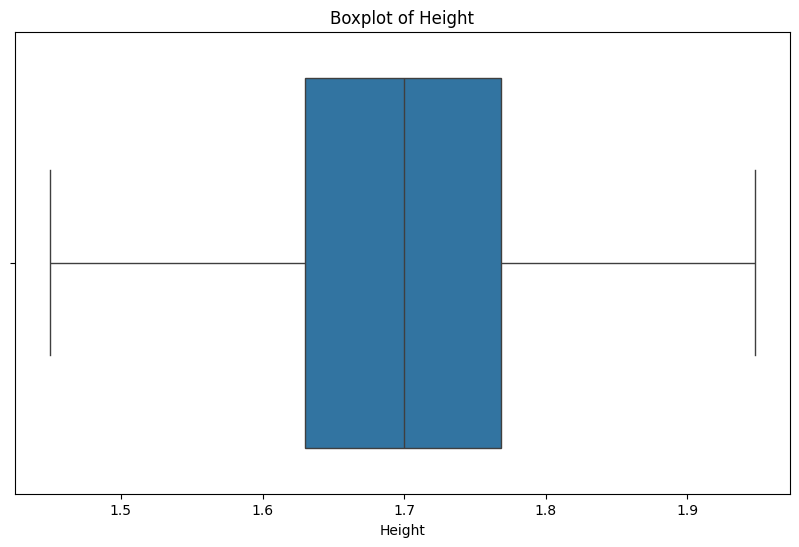

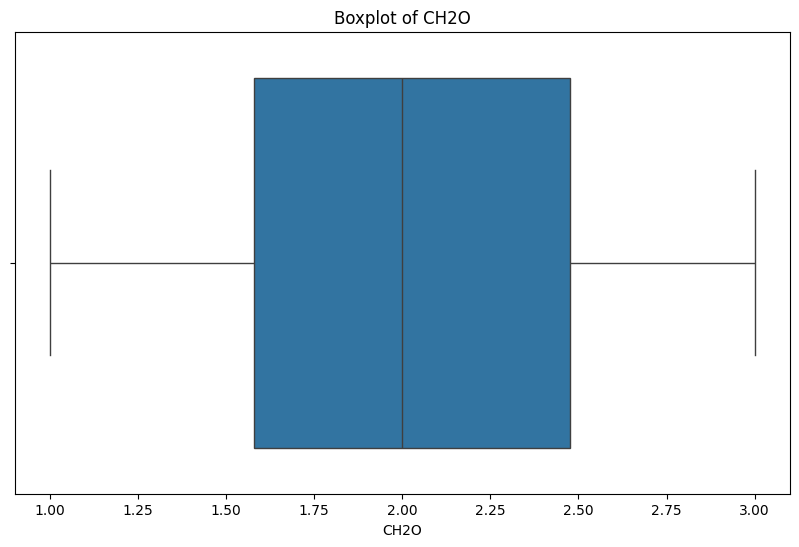

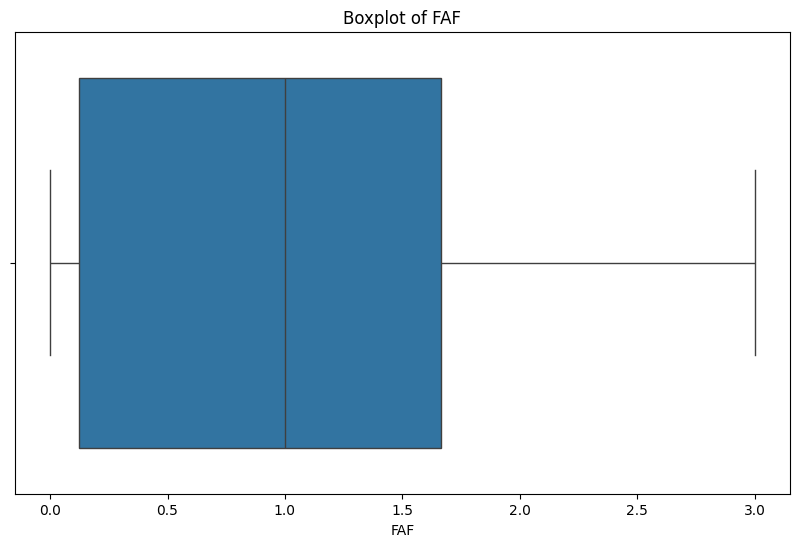

In [42]:
relevant_cols = ['Weight', 'Height', 'CH2O', 'FAF']
for col in relevant_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Os boxplots atualizados para as variáveis Weight, Height, CH2O (consumo de água) e FAF (frequência de atividade física) após a remoção dos outliers mostram uma melhoria considerável na distribuição desses dados:

Weight (Peso):

A distribuição parece mais uniforme e centrada, com menos valores extremos, o que pode melhorar a qualidade das análises relacionadas ao peso.
Height (Altura):

Similar ao peso, a altura mostra uma distribuição mais compacta e controlada, reduzindo a influência de valores anormalmente baixos ou altos que poderiam distorcer análises relacionadas à estatura.
CH2O (Consumo de Água):

A distribuição agora parece mais equilibrada com extremos menos pronunciados, sugerindo que os valores mais atípicos foram removidos, o que é crucial para análises que consideram hidratação e saúde geral.
FAF (Frequência de Atividade Física):

A remoção de outliers também ajudou a normalizar a distribuição desta variável, limitando valores que eram inusualmente altos ou baixos, proporcionando uma visão mais realista da atividade física dos indivíduos.
Conclusão:
A remoção dos outliers parece ter melhorado a confiabilidade dos dados ao minimizar a influência de valores atípicos que poderiam levar a conclusões errôneas. Isso é particularmente importante em um estudo sobre obesidade, onde medidas precisas de variáveis físicas e de comportamento são fundamentais. Agora, os dados parecem mais representativos da tendência geral da população estudada, permitindo uma análise mais precisa e confiável.